In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples = 1000, n_features = 2, n_classes = 2, n_clusters_per_class = 2, n_redundant = 0)

<Axes: xlabel='0', ylabel='1'>

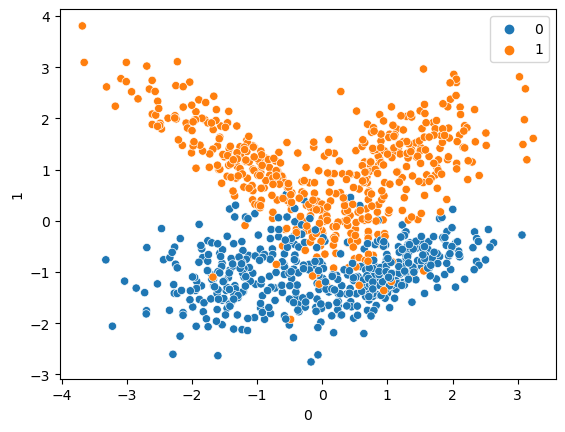

In [3]:
sns.scatterplot(x = pd.DataFrame(X)[0], y = pd.DataFrame(X)[1], hue = y)

In [4]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.25, random_state = 10)

In [5]:
from sklearn.svm import SVC

svc = SVC(kernel = 'linear')
svc.fit(X_train, y_train)
print("Coefficient or Slope:", svc.coef_)

Coefficient or Slope: [[0.00227167 2.20009765]]


In [6]:
y_test_prediction = svc.predict(X_test)

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print(confusion_matrix(y_test, y_test_prediction))
print(accuracy_score(y_test, y_test_prediction))
print(classification_report(y_test, y_test_prediction))

[[121   5]
 [ 17 107]]
0.912
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       126
           1       0.96      0.86      0.91       124

    accuracy                           0.91       250
   macro avg       0.92      0.91      0.91       250
weighted avg       0.92      0.91      0.91       250



## Hyper-parameter Tunning

In [9]:
params = {
    'C' : [0.1, 1, 10,  100, 1000],
    'gamma' : [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel' : ['linear']
}

In [10]:
from sklearn.model_selection import GridSearchCV

gscv = GridSearchCV(SVC(), param_grid = params, refit = True, cv = 5, verbose = 3)
gscv.fit(X_train, y_train)
y_test_prediction = gscv.predict(X_test)

print("Best Parameters:", gscv.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.887 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.927 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.900 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.947 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.887 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.887 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.927 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.900 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.947 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.887 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.887 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

In [11]:
print(confusion_matrix(y_test, y_test_prediction))
print(accuracy_score(y_test, y_test_prediction))
print(classification_report(y_test, y_test_prediction))

[[121   5]
 [ 17 107]]
0.912
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       126
           1       0.96      0.86      0.91       124

    accuracy                           0.91       250
   macro avg       0.92      0.91      0.91       250
weighted avg       0.92      0.91      0.91       250

